In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = tf.keras.models.load_model('model.h5')

In [47]:
directory_data_test = "data/test"

In [48]:
IMG_SIZE = 128

test_datagen = ImageDataGenerator(rescale = 1./255)

test_ds = test_datagen.flow_from_directory(
    directory = directory_data_test,
    batch_size = 32,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='categorical'
)

Found 1025 images belonging to 10 classes.


In [49]:
import matplotlib.pyplot as plt

# Đánh giá mô hình
loss, accuracy = model.evaluate(test_ds)
print(f'Loss: {loss}, Accuracy: {accuracy}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8656 - loss: 0.5344
Loss: 0.5534473657608032, Accuracy: 0.8575609922409058


In [50]:
# model.summary()

In [51]:
import pickle

# Tải lại lịch sử huấn luyện
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)

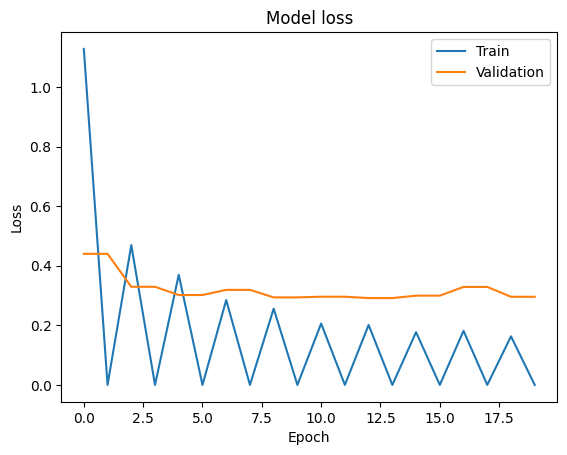

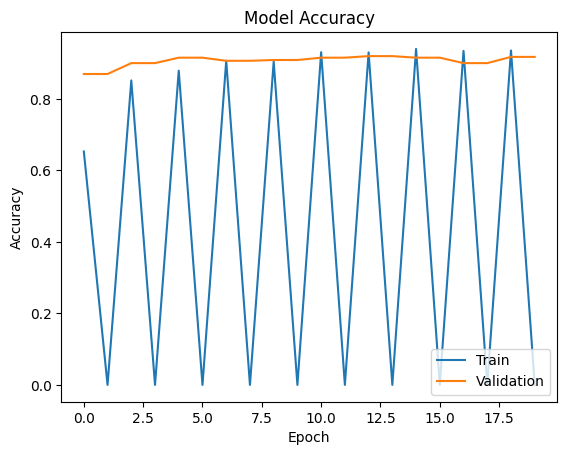

In [52]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


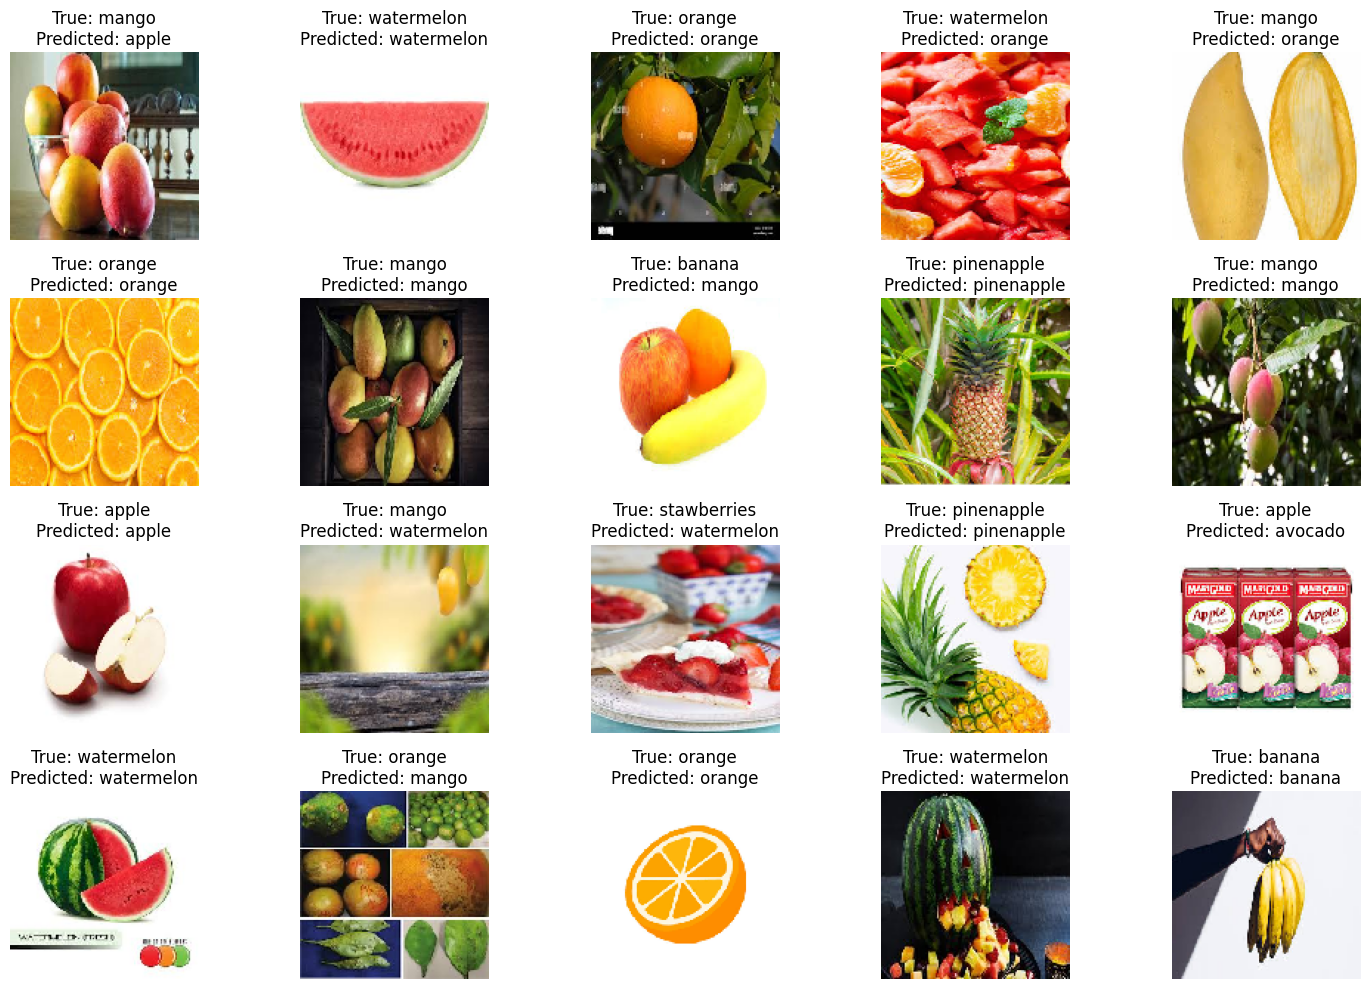

In [53]:
import numpy as np
# Get the class labels
class_labels = list(test_ds.class_indices.keys())

# Predict on each image and plot results
num_images = 20
num_images_per_row = 5  # Set the number of images per row
num_rows = 4

plt.figure(figsize=(15, 10))
for i in range(num_images):
    image, label = next(test_ds)
    predictions = model.predict(image)
    
    # Iterate over each image in the batch
    for j in range(len(image)):
        if i * len(image) + j < num_images:  # Check if the total number of images exceeds the desired count
            predicted_class = class_labels[np.argmax(predictions[j])]
            true_class = class_labels[np.argmax(label[j])]
            
            plt.subplot(num_rows, num_images_per_row, i * len(image) + j + 1)
            plt.imshow(image[j])
            plt.title(f'True: {true_class}\nPredicted: {predicted_class}')
            plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_fruit(image_path):
    img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thay đổi kích thước để phù hợp với đầu vào của mô hình
    img_array /= 255.0  # Chuẩn hóa dữ liệu

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_label = ([('apple', 0), ('avocado', 1), ('banana', 2), ('cherry', 3), ('kiwi', 4), ('mango', 5), ('orange', 6), ('pinenapple', 7), ('strawberries', 8), ('watermelon', 9)])

    class_label = {v: k for k, v in class_label}
    
    return class_label[class_index]

# Ví dụ dự đoán
print(predict_fruit('data/predict/img_41.jpeg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
avocado


In [55]:
# from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# # Bước 1: Dự đoán nhãn cho dữ liệu kiểm tra
# y_pred_probs = model.predict(test_ds)  # Dự đoán xác suất của các nhãn
# y_pred = y_pred_probs.argmax(axis=1)   # Chuyển đổi xác suất thành nhãn dự đoán

# # Bước 2: Lấy nhãn thực tế từ test_ds
# y_true = []  # Danh sách để lưu nhãn thực tế
# for _, labels in test_ds:
#     y_true.extend(labels.argmax(axis=1))  # Chuyển nhãn thực tế từ one-hot thành nhãn dạng số

# # Bước 3: Tính toán các chỉ số đánh giá
# precision = precision_score(y_true, y_pred, average='weighted')
# # recall = recall_score(y_true, y_pred, average='weighted')
# # f1 = f1_score(y_true, y_pred, average='weighted')

# # In kết quả
# print(f"Precision: {precision:.4f}")
# # print(f"Recall: {recall:.4f}")
# # print(f"F1-Score: {f1:.4f}")

# # Bước 4: In báo cáo chi tiết
# class_label = ([('apple', 0), ('avocado', 1), ('banana', 2), ('cherry', 3), ('kiwi', 4), ('mango', 5), ('orange', 6), ('pinenapple', 7), ('strawberries', 8), ('watermelon', 9)])

# report = classification_report(y_true, y_pred, target_names=class_label)
# print(report)
